<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Melanoma_(SKCM)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.SKCM.sampleMap_HiSeqV2_PANCAN.gz  TCGA.SKCM.sampleMap_SKCM_clinicalMatrix


In [3]:
!pip install sparse_lmm

In [4]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.SKCM.sampleMap_SKCM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.SKCM.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)


In [5]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_data/public/TCGA/SKCM/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_SKCM_RPPA,_GENOMIC_ID_TCGA_SKCM_mutation_bcm_gene,_GENOMIC_ID_TCGA_SKCM_mutation_broad_gene,_GENOMIC_ID_TCGA_SKCM_gistic2,_GENOMIC_ID_TCGA_SKCM_mutation,_GENOMIC_ID_TCGA_SKCM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_SKCM_PDMRNAseqCNV,_GENOMIC_ID_TCGA_SKCM_PDMRNAseq,_GENOMIC_ID_TCGA_SKCM_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,TCGA-3N-A9WB-06,TCGA-3N-A9WB,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,71.0,NaN,TCGA-3N-A9WB,...,NaN,NaN,NaN,TCGA-3N-A9WB-06A-11D-A38G-08,TCGA-3N-A9WB-06A-11D-A38F-01,NaN,4c243ea9-dfe1-42f0-a887-3c901fb38542,NaN,NaN,4c243ea9-dfe1-42f0-a887-3c901fb38542
TCGA-3N-A9WC-06,TCGA-3N-A9WC-06,TCGA-3N-A9WC,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,TCGA-3N-A9WC-F67104,TCGA-3N-A9WC,...,TCGA-3N-A9WC-06,F9B0B31B-24AB-4F30-8EF8-4A4ED282EF04,NaN,TCGA-3N-A9WC-06A-11D-A38G-08,TCGA-3N-A9WC-06A-11D-A38F-01,NaN,a64ae1f5-a189-4173-be13-903bd7637869,NaN,NaN,a64ae1f5-a189-4173-be13-903bd7637869
TCGA-3N-A9WD-06,TCGA-3N-A9WD-06,TCGA-3N-A9WD,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,NaN,TCGA-3N-A9WD,...,TCGA-3N-A9WD-06,6AFC3678-9499-49A6-AD7A-30F3D185B4BD,NaN,TCGA-3N-A9WD-06A-11D-A38G-08,TCGA-3N-A9WD-06A-11D-A38F-01,NaN,ac19f7cf-670b-4dcc-a26b-db0f56377231,NaN,NaN,ac19f7cf-670b-4dcc-a26b-db0f56377231
TCGA-BF-A1PU-01,TCGA-BF-A1PU-01,TCGA-BF-A1PU,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,46.0,TCGA-BF-A1PU-F68906,TCGA-BF-A1PU,...,TCGA-BF-A1PU-01,7E74CAFD-C47B-4F98-A349-BBD2AC699D2D,TCGA-BF-A1PU-01A-11D-A19A-08,TCGA-BF-A1PU-01A-11D-A19A-08,NaN,TCGA-BF-A1PU-01A-11D-A19A-08,9ff4d588-da73-4e26-975d-2b098fe74984,NaN,NaN,9ff4d588-da73-4e26-975d-2b098fe74984
TCGA-BF-A1PV-01,TCGA-BF-A1PV-01,TCGA-BF-A1PV,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,74.0,TCGA-BF-A1PV-F68907,TCGA-BF-A1PV,...,TCGA-BF-A1PV-01,NaN,TCGA-BF-A1PV-01A-11D-A19A-08,TCGA-BF-A1PV-01A-11D-A19A-08,NaN,TCGA-BF-A1PV-01A-11D-A19A-08,a57841bb-fa68-4d84-85e0-2d5e4f3ce828,NaN,NaN,a57841bb-fa68-4d84-85e0-2d5e4f3ce828


In [6]:
# Display gene dataset
gene_data.head()

,TCGA-YD-A89C-06,TCGA-Z2-AA3V-06,TCGA-EB-A3Y6-01,TCGA-EE-A3JA-06,TCGA-D9-A4Z2-01,TCGA-D3-A51G-06,TCGA-3N-A9WD-06,TCGA-GF-A2C7-01,TCGA-WE-A8ZY-06,TCGA-D3-A8GI-06,...,TCGA-EE-A2GC-06,TCGA-FR-A44A-06,TCGA-EB-A82B-01,TCGA-FR-A2OS-01,TCGA-EB-A5VV-06,TCGA-FW-A3R5-06,TCGA-D3-A3MR-06,TCGA-D3-A51E-06,TCGA-GN-A4U7-06,TCGA-D3-A51R-06
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.746592,0.578808,-0.363492,-2.972792,-0.128492,-0.429992,0.072208,-1.510092,-0.485092,-2.085592,...,-0.480992,0.241708,0.195108,-1.646592,-2.066892,-0.988592,0.050908,-0.742892,-1.079192,-1.008592
HIF3A,-0.753826,-2.306626,-2.679226,-3.619326,0.679074,-4.062626,-0.610426,-3.200626,-4.505126,-4.077526,...,-5.554726,-4.598826,-0.051626,-2.805326,0.643774,-3.958826,-2.071826,-3.552226,-3.370526,2.149774
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,6.378465,-0.531035,-0.531035,0.837365,-0.091035,-0.531035,...,-0.531035,2.199965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.663465,-0.531035,8.619165
RNF10,0.495328,0.102328,-0.614772,0.029328,0.401728,-1.013672,-0.348672,-0.013272,0.254428,-0.000572,...,-0.019972,-0.454072,0.092628,-0.519872,0.042628,-0.314572,0.345128,-0.359072,0.449428,0.037228
RNF11,-1.380078,-3.047278,-0.372778,0.823422,-0.124378,0.266522,0.015422,-0.146678,0.635422,-1.849278,...,0.767122,-0.204778,-0.360778,0.109122,-0.718378,0.135822,-0.816778,0.479722,-0.322478,-1.335778


In [7]:
# Set Basic info

trait = 'Melanoma'
condition = 'Inflammation'
condition_col = 'EGFR'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')


The clinical dataset has 93 features, and the gene dataset includes 20530 genes


In [8]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,TCGA-3N-A9WB-06,TCGA-3N-A9WB,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,71.0,NaN,TCGA-3N-A9WB,...,-0.748878,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588
TCGA-3N-A9WC-06,TCGA-3N-A9WC-06,TCGA-3N-A9WC,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,TCGA-3N-A9WC-F67104,TCGA-3N-A9WC,...,-0.748878,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588
TCGA-3N-A9WD-06,TCGA-3N-A9WD-06,TCGA-3N-A9WD,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,NaN,TCGA-3N-A9WD,...,-0.748878,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188
TCGA-BF-A1PU-01,TCGA-BF-A1PU-01,TCGA-BF-A1PU,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,46.0,TCGA-BF-A1PU-F68906,TCGA-BF-A1PU,...,0.451922,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812
TCGA-BF-A1PV-01,TCGA-BF-A1PV-01,TCGA-BF-A1PV,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,74.0,TCGA-BF-A1PV-F68907,TCGA-BF-A1PV,...,-0.371578,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212


In [9]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,-3.455127,-0.372292,-3.960426,-0.531035,-0.401172,-0.467978,0.13149,-1.101494,-1.715046,0.066001,...,-0.748878,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588
TCGA-3N-A9WC-06,-4.250327,1.350708,-2.586626,-0.531035,-0.354872,0.237222,0.67979,-0.764494,-1.153546,0.063601,...,-0.748878,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588
TCGA-3N-A9WD-06,-0.788027,0.072208,-0.610426,-0.531035,-0.348672,0.015422,0.44469,0.099806,0.897254,-0.423399,...,-0.748878,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188
TCGA-BF-A1PU-01,-4.906527,-0.467292,-2.587926,-0.531035,-0.124072,-1.788178,-0.19171,-0.117594,-0.239446,-0.423399,...,0.451922,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812
TCGA-BF-A1PV-01,-5.178627,-1.963792,-5.554726,-0.153735,-0.270672,0.070922,0.14779,-0.094394,-2.379146,-0.046099,...,-0.371578,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212


In [10]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,EGFR,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Melanoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,-3.455127,-0.372292,-3.960426,-0.531035,-0.401172,-0.467978,0.13149,-1.101494,-1.715046,0.066001,...,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588,1
TCGA-3N-A9WC-06,-4.250327,1.350708,-2.586626,-0.531035,-0.354872,0.237222,0.67979,-0.764494,-1.153546,0.063601,...,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588,1
TCGA-3N-A9WD-06,-0.788027,0.072208,-0.610426,-0.531035,-0.348672,0.015422,0.44469,0.099806,0.897254,-0.423399,...,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188,1
TCGA-BF-A1PU-01,-4.906527,-0.467292,-2.587926,-0.531035,-0.124072,-1.788178,-0.19171,-0.117594,-0.239446,-0.423399,...,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812,1
TCGA-BF-A1PV-01,-5.178627,-1.963792,-5.554726,-0.153735,-0.270672,0.070922,0.14779,-0.094394,-2.379146,-0.046099,...,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212,1


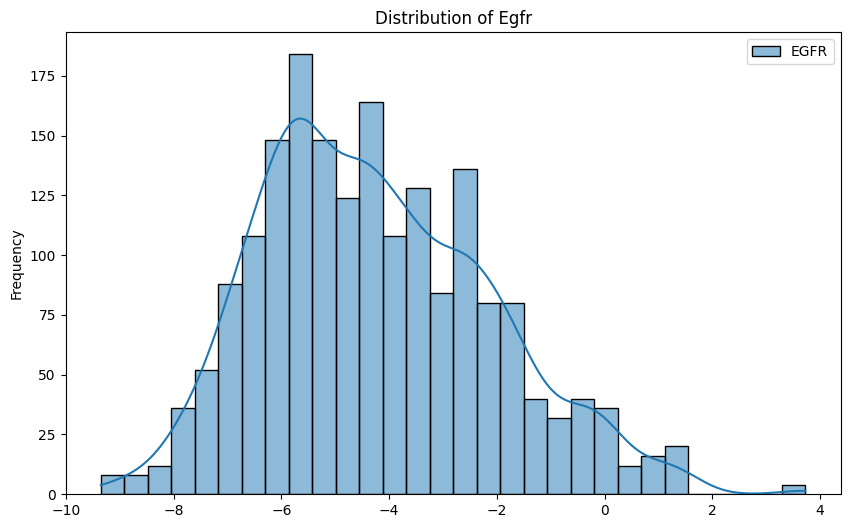

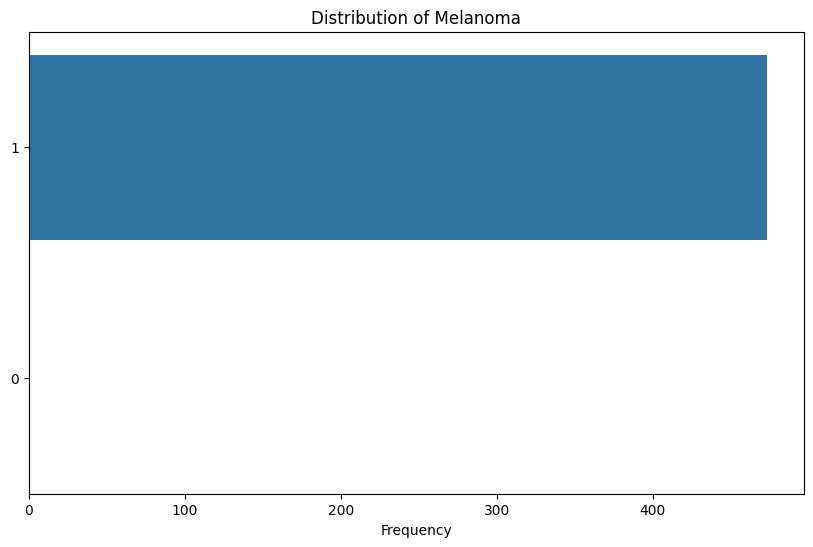

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()


def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'EGFR' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [15]:
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,Inflammation,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Melanoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,-3.455127,-0.372292,-3.960426,-0.531035,-0.401172,-0.467978,0.13149,-1.101494,-1.715046,0.066001,...,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588,1
TCGA-3N-A9WC-06,-4.250327,1.350708,-2.586626,-0.531035,-0.354872,0.237222,0.67979,-0.764494,-1.153546,0.063601,...,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588,1
TCGA-3N-A9WD-06,-0.788027,0.072208,-0.610426,-0.531035,-0.348672,0.015422,0.44469,0.099806,0.897254,-0.423399,...,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188,1
TCGA-BF-A1PU-01,-4.906527,-0.467292,-2.587926,-0.531035,-0.124072,-1.788178,-0.19171,-0.117594,-0.239446,-0.423399,...,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812,1
TCGA-BF-A1PV-01,-5.178627,-1.963792,-5.554726,-0.153735,-0.270672,0.070922,0.14779,-0.094394,-2.379146,-0.046099,...,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212,1


In [16]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [17]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-16-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-16-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 93.43% ± 2.89%


/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [18]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-16-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [19]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Inflammation
Coefficient: -0.0052
p-value: 0.3996



In [20]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)


Genes with corrected p-value < 0.05, affecting the trait Melanoma conditional on the factor Inflammation, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
      TTTY16     0.498945       0.000000e+00
     DEFB114     0.498945       0.000000e+00
     SNAR-C2    -0.498945       0.000000e+00
     DEFB113    -0.498945       0.000000e+00
     SNORA30     0.498945       0.000000e+00
    SNORD88B     0.498945       0.000000e+00
      TTTY21     0.498945       0.000000e+00
   KRTAP22-1    -0.498945       0.000000e+00
    SNORD88C    -0.498945       0.000000e+00
    DEFB105A     0.498945       0.000000e+00
      OR2T29     0.498945       0.000000e+00
       OR1S1     0.498945       0.000000e+00
        DUX4    -0.498945       0.000000e+00
     SNORD46    -0.498945       0.000000e+00
     DEFB110    -0.498945       0.000000e+00
    DEFB106A     0.498945       0.000000e+00
     TMEM225    -0.498945       0.000000e+00
LOC100169752     0.498945       0.000000e+00
     SNORA